In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from tqdm.notebook import tqdm
from datetime import datetime
from random import choice
from glob import glob
import gmplot

In [10]:
files = glob("/Users/karan/Downloads/feb_20_corrected/*")
db = sqlite3.connect(files[0])

In [12]:
output = db.execute("Select speed, timestamp, route_id, trip_id, lat, lng from vehicle_feed;")

In [13]:
to_radian = lambda x : x/57.29577951
def distance(lat1, lon1, lat2, lon2):
    lat1 = to_radian(lat1)
    lon = to_radian(lon1) - to_radian(lon2)
    lat2 = to_radian(lat2)
    a = np.sin((lat1-lat2) / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon / 2)**2
    c = 2*np.arcsin(np.sqrt(a))

    return 6373.0 * c * 1000

In [18]:
data = {}
for e in tqdm(output):
    if int(e[2]) not in data:
        data[int(e[2])]  = {}
    if e[3] not in data[int(e[2])]:
        data[int(e[2])][e[3]]  = []
        
    data[int(e[2])][e[3]].append([int(e[1]), float(e[0]), float(e[-2]), float(e[-1])])

In [61]:

factor = []
count = []
mean = []
latitude_list = []
longitude_list = []


for _ in tqdm(range(1)):
    choiced = choice(list(data.keys()))
    index = choice(list(data[choiced].keys()))
    last = data[choiced][index][0]
    predicted_speed = [0]
    data_speed = [0]
    max_time = 0
    for e in data[choiced][index][1:]:
        time = (e[0]-last[0])
        if time > max_time:
            max_time = time
        if time == 0:
            last = e
            continue
        dist = distance(last[2], last[3], e[2], e[3])
        predicted_speed.append((dist/time))
        data_speed.append((e[1] + last[1])/2)
        latitude_list.append(e[2])
        longitude_list.append(e[3])
        last = e
    data_speed = np.array(data_speed)
    predicted_speed = np.array(predicted_speed)

    # if max_time < 30 and len(data_speed) > 10:
    #     break

    # factor.append(np.mean((predicted_speed/data_speed) [data_speed!=0]))
    # count.append(len(data_speed))
    # mean.append(np.mean(data_speed))


normalized_data_speed = (data_speed - np.min(data_speed))/(np.max(data_speed)-np.min(data_speed))
normalized_pred_speed = (predicted_speed - np.min(predicted_speed))/(np.max(predicted_speed)-np.min(predicted_speed))

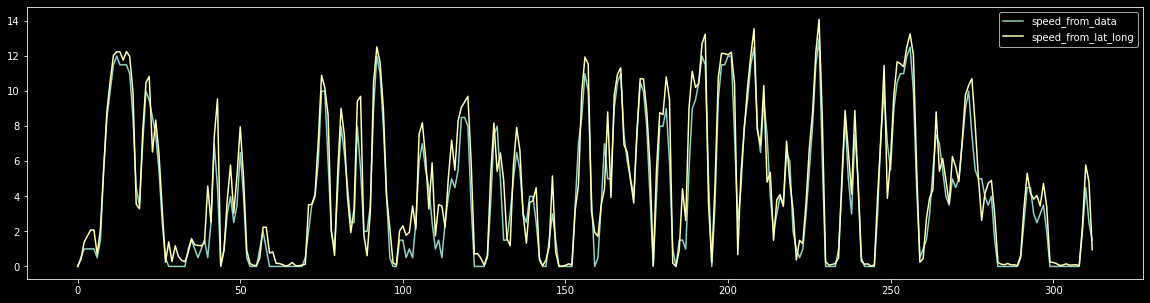

In [64]:
plt.figure(figsize=(20, 5))
plt.plot(data_speed*3.6, label="speed_from_data")
plt.plot(predicted_speed, label="speed_from_lat_long")
plt.legend()

In [63]:
# latitude_list = [e[2] for e in data[choiced][index]]
# longitude_list = [e[3] for e in data[choiced][index]]
  
gmap3 = gmplot.GoogleMapPlotter(lat = latitude_list[0], lng = longitude_list[0], zoom=15) 

for e in range(len(latitude_list)):
    gmap3.marker(latitude_list[e], longitude_list[e], title="{}".format(data_speed[e]*3.6 - predicted_speed[e]))

# gmap3.scatter( latitude_list[:1], longitude_list[:1], '#228B22', 
#                               size = 40, marker = False ) 
# gmap3.scatter( latitude_list[1:], longitude_list[1:], '# FF0000', 
#                               size = 10, marker = False ) 

gmap3.plot(latitude_list, longitude_list,  
           'cornflowerblue', edge_width = 2.5) 
  
gmap3.draw( "map.html" )

In [36]:
len(latitude_list)

1218

In [524]:
factor = np.array(factor)
mean = np.array(mean)
count = np.array(count)

In [258]:
np.mean(3.6*data_speed)

3.0602006504766917

In [259]:
np.std(3.6*data_speed)

4.314522534919863

In [260]:
tdp = 3.6*data_speed

In [261]:
(tdp - np.mean(3.6*data_speed))/np.std(3.6*data_speed)

array([ 0.68137301, -0.01395304, -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 ,
       -0.7092791 , -0.7092791 , -0.7092791 , -0.7092791 , -0.70

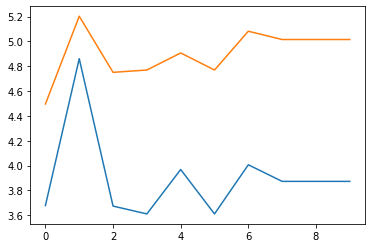

In [251]:
plt.plot(factor[count == 40])
plt.plot(5.5-mean[count == 40]*0.3)

In [201]:
mean[count == 2]

array([1.31944442, 2.0833334 , 1.31944448, 0.62499999, 2.36111116,
       1.11111107, 1.73611107, 2.36111116, 1.31944448, 2.70833331,
       2.77777767, 1.24999997, 2.22222233, 1.31944448, 1.11111107,
       0.62499999, 2.0833334 ])

In [202]:
factor[count == 2]

array([1.81207236, 2.17074421, 2.16753967, 1.85964853, 2.20543742,
       1.73122606, 2.66647027, 2.20543742, 2.16753967, 1.41920718,
       1.91126886, 1.69172767, 1.78414778, 2.16753967, 1.73122606,
       1.85964853, 2.17074421])

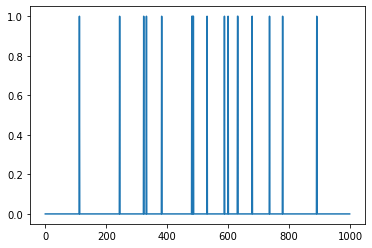

In [196]:
plt.plot(count == 2)

In [211]:
np.count_nonzero(count == 40)

16

In [208]:
tpp = np.unique(count, return_counts=True)

In [210]:
tpp[0][tpp[1] == 16]

array([40])

In [49]:
print(choiced, index)

244 244_15_30
